In [1]:
library("ppcor")
library("stringr")

Loading required package: MASS



In [2]:
## MAGMA results for CAD and SCZ

SCZ=read.table("./Data/magma.genes_SCZ.out", header = TRUE)
CAD=read.table("./Data/magma.genes_CAD.out", header = TRUE)

In [3]:
gtex=read.delim(file="./Data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", skip=2)

In [4]:
gtex_mean_expression=rowMeans(gtex[,3:dim(gtex)[2]]) 
gtex_brain_expression=rowMeans(gtex[,10:22]) 
gtex_artery_expression=rowMeans(gtex[,6:8]) 
GTEX_Exp=gtex_mean_expression[match( SCZ$SYMBOL, names(gtex_mean_expression))]

In [5]:
names(gtex_mean_expression)=gtex$Description
names(gtex_brain_expression)=gtex$Description
names(gtex_artery_expression)=gtex$Description

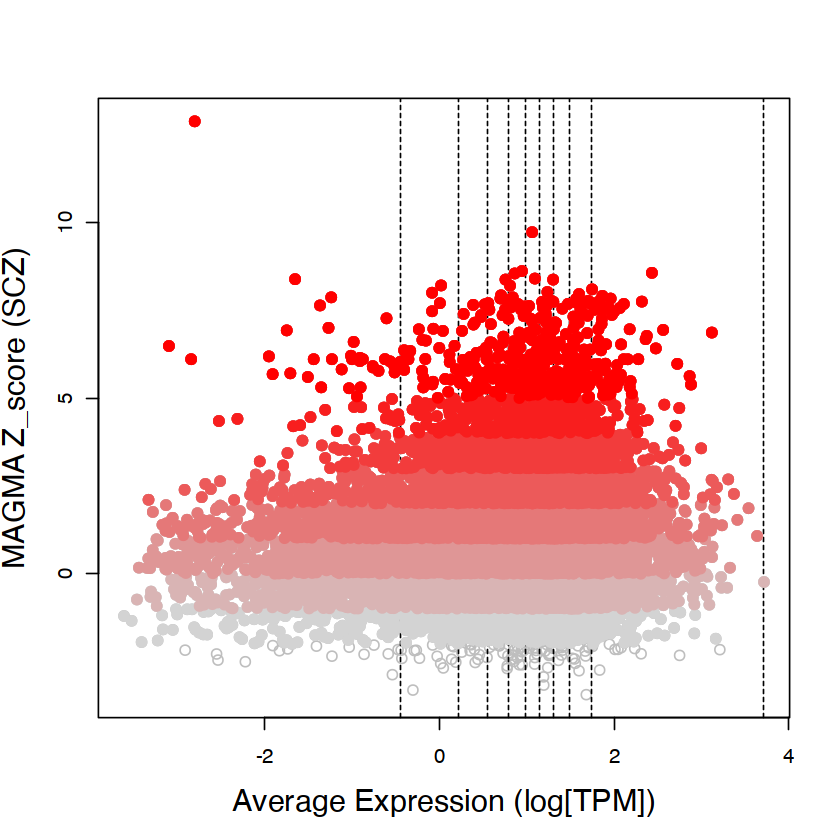

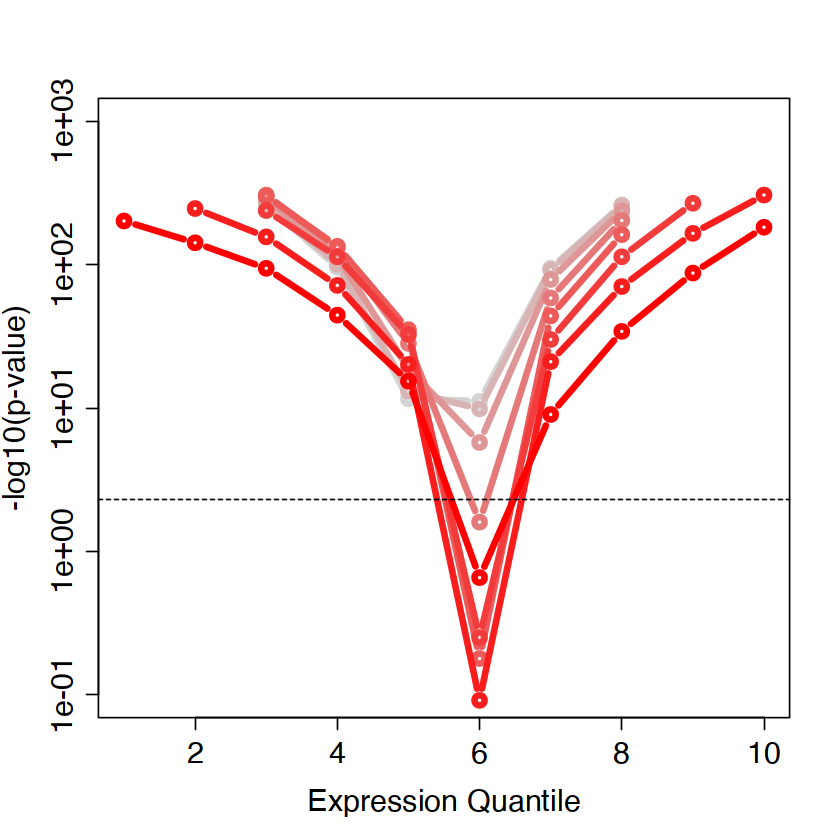

In [7]:
### SCZ 

ER_A=read.csv("./Data/Chakraborty_Genomics_2016_1-s2.0-S0888754315300392-mmc1.csv", header = TRUE)

GTEX_Exp=gtex_mean_expression[match( SCZ$SYMBOL, names(gtex_mean_expression))]
dNdS=ER_A$average_dN.dS[match(SCZ$GENE, ER_A$Ensembl.Gene.ID)]

SCZ_new=cbind(dNdS, GTEX_Exp, SCZ)
SCZ_new=as.data.frame(SCZ_new)


plot(log10(SCZ_new$GTEX_Exp), SCZ_new$ZSTAT, col="gray", xlab="Average Expression (log[TPM])", ylab="MAGMA Z_score (SCZ)", cex.lab=1.5)
GTEX_qs=quantile(log10(SCZ_new$GTEX_Exp), seq(0,1,0.1), na.rm = TRUE)
abline(v=GTEX_qs, lty=2)


Z_qs=c(-2, -1, 0,1,2,3,4,5)

n_bins=length(Z_qs)
colfunc <- colorRampPalette(c("lightgray", "red"))
cols=colfunc(n_bins)

p_val_quantile=list()

for (i in 1:n_bins){
    
index_in= which(SCZ_new$ZSTAT >= Z_qs[i])
lines(log10(SCZ_new$GTEX_Exp)[index_in], SCZ_new$ZSTAT[index_in], type="p", col=cols[i], pch=19)
    
E_qs=quantile(SCZ_new$GTEX_Exp, probs = seq(0,1,0.1), na.rm = TRUE)
index_top=index_in

p_val_quantile_SCZ_expression=rep(NA, length(E_qs)-1)

for (j in 2:length(E_qs)){
    
    
index_bin=which ( (SCZ_new$GTEX_Exp > E_qs[j-1]) & (SCZ_new$GTEX_Exp < E_qs[j]) )
wil_test=wilcox.test(SCZ_new$GTEX_Exp[index_top], SCZ_new$GTEX_Exp[index_bin], na.action = na.exclude)
p_val_quantile_SCZ_expression[j-1]=-log10(wil_test$p.value)

}

    
  p_val_quantile[[i]]=  p_val_quantile_SCZ_expression  
    
}



for (i in 1:n_bins){
    
    if (i==1){
        plot(p_val_quantile[[i]], type="b", col=cols[i], lwd=4, log="y", ylim=c(0.1,1000), cex.lab=1.5, cex.axis=1.5, xlab="Expression Quantile", ylab="-log10(p-value)")
    } else {
        lines(p_val_quantile[[i]], type="b", col=cols[i], lwd=4)
    }
    
}

abline(h=-log10(0.05/10), lty=2)

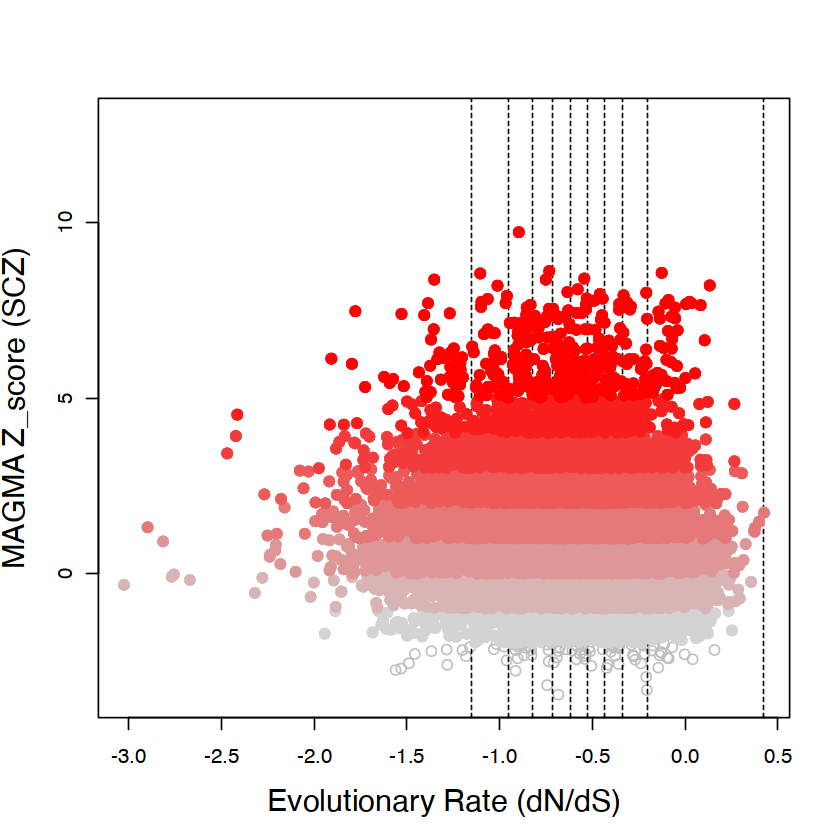

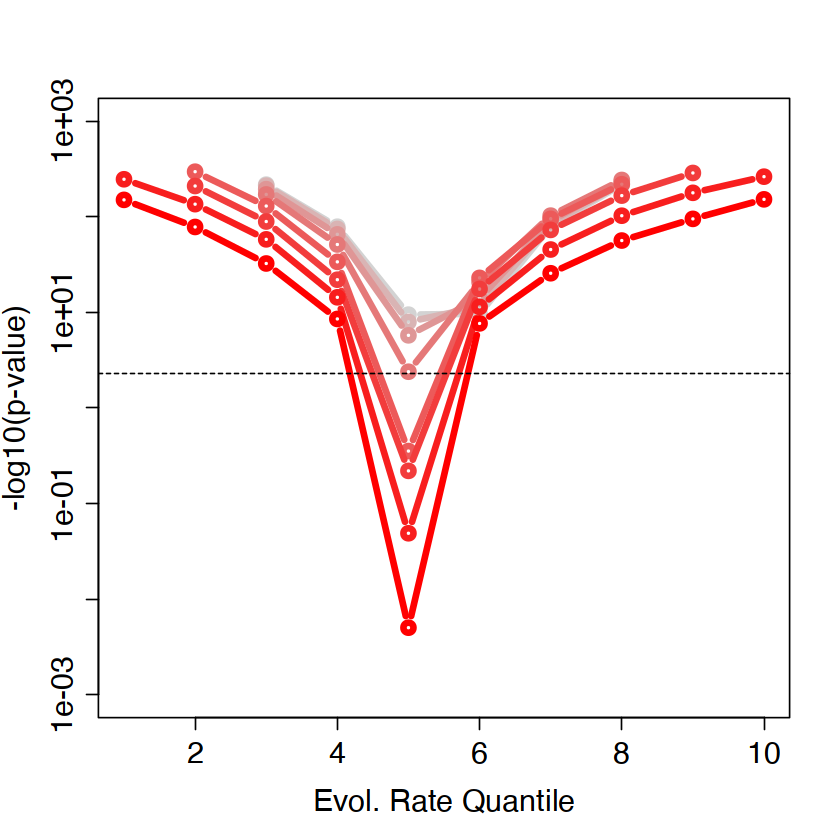

In [8]:
### SCZ 


GTEX_Exp=gtex_mean_expression[match( SCZ$SYMBOL, names(gtex_mean_expression))]
dNdS=ER_A$average_dN.dS[match(SCZ$GENE, ER_A$Ensembl.Gene.ID)]

SCZ_new=cbind(dNdS, GTEX_Exp, SCZ)
SCZ_new=as.data.frame(SCZ_new)


plot(log10(SCZ_new$dNdS), SCZ_new$ZSTAT, col="gray", xlab="Evolutionary Rate (dN/dS)", ylab="MAGMA Z_score (SCZ)", cex.lab=1.5)
GTEX_qs=quantile(log10(SCZ_new$dNdS), seq(0,1,0.1), na.rm = TRUE)
abline(v=GTEX_qs, lty=2)


Z_qs=c(-2, -1, 0,1,2,3,4,5)

n_bins=length(Z_qs)
colfunc <- colorRampPalette(c("lightgray", "red"))
cols=colfunc(n_bins)

p_val_quantile=list()

for (i in 1:n_bins){
    
index_in= which(SCZ_new$ZSTAT >= Z_qs[i])
lines(log10(SCZ_new$dNdS)[index_in], SCZ_new$ZSTAT[index_in], type="p", col=cols[i], pch=19)
    
E_qs=quantile(SCZ_new$dNdS, probs = seq(0,1,0.1), na.rm = TRUE)
index_top=index_in

p_val_quantile_SCZ_expression=rep(NA, length(E_qs)-1)

for (j in 2:length(E_qs)){
    
    
index_bin=which ( (SCZ_new$dNdS > E_qs[j-1]) & (SCZ_new$dNdS < E_qs[j]) )
wil_test=wilcox.test(SCZ_new$dNdS[index_top], SCZ_new$dNdS[index_bin], na.action = na.exclude)
p_val_quantile_SCZ_expression[j-1]=-log10(wil_test$p.value)

}

    
  p_val_quantile[[i]]=  p_val_quantile_SCZ_expression  
    
}



for (i in 1:n_bins){
    
    if (i==1){
        plot(p_val_quantile[[i]], type="b", col=cols[i], lwd=4, log="y", ylim=c(0.001,1000), cex.lab=1.5, cex.axis=1.5, xlab="Evol. Rate Quantile", ylab="-log10(p-value)")
    } else {
        lines(p_val_quantile[[i]], type="b", col=cols[i], lwd=4)
    }
    
}

abline(h=-log10(0.05/10), lty=2)

In [ ]:
##### SCZ

Z_qs=seq(-2,5, 1)

### part 1: Mean Expression

GTEX_Exp=gtex_mean_expression[match( SCZ$SYMBOL, names(gtex_mean_expression))]
dNdS=ER_A$average_dN.dS[match(SCZ$GENE, ER_A$Ensembl.Gene.ID)]

SCZ_new=cbind(dNdS, GTEX_Exp, SCZ)
SCZ_new=as.data.frame(SCZ_new)


plot(log10(SCZ_new$GTEX_Exp), SCZ_new$ZSTAT, col="gray", xlab="Average Expression (log[TPM])", ylab="MAGMA Z_score (SCZ)", cex.lab=1.5)
GTEX_qs=quantile(log10(SCZ_new$GTEX_Exp), seq(0,1,0.1), na.rm = TRUE)
abline(v=GTEX_qs, lty=2)



n_bins=length(Z_qs)
colfunc <- colorRampPalette(c("lightgray", "red"))
cols=colfunc(n_bins)

p_val_quantile_MEAN=list()

for (i in 1:n_bins){
    
index_in= which(SCZ_new$ZSTAT >= Z_qs[i])
lines(log10(SCZ_new$GTEX_Exp)[index_in], SCZ_new$ZSTAT[index_in], type="p", col=cols[i], pch=19)
    
E_qs=quantile(SCZ_new$GTEX_Exp, probs = seq(0,1,0.1), na.rm = TRUE)
index_top=index_in

p_val_quantile_SCZ_expression=rep(NA, length(E_qs)-1)

for (j in 2:length(E_qs)){
    
    
index_bin=which ( (SCZ_new$GTEX_Exp > E_qs[j-1]) & (SCZ_new$GTEX_Exp < E_qs[j]) )
wil_test=wilcox.test(SCZ_new$GTEX_Exp[index_top], SCZ_new$GTEX_Exp[index_bin], na.action = na.exclude)
p_val_quantile_SCZ_expression[j-1]=-log10(wil_test$p.value)

}

    
  p_val_quantile_MEAN[[i]]=  p_val_quantile_SCZ_expression  
    
}


### part 2: Brain Expression

GTEX_Exp=gtex_brain_expression[match( SCZ$SYMBOL, names(gtex_brain_expression))]
dNdS=ER_A$average_dN.dS[match(SCZ$GENE, ER_A$Ensembl.Gene.ID)]

SCZ_new=cbind(dNdS, GTEX_Exp, SCZ)
SCZ_new=as.data.frame(SCZ_new)


plot(log10(SCZ_new$GTEX_Exp), SCZ_new$ZSTAT, col="gray", xlab="Brain Expression (log[TPM])", ylab="MAGMA Z_score (SCZ)", cex.lab=1.5)
GTEX_qs=quantile(log10(SCZ_new$GTEX_Exp), seq(0,1,0.1), na.rm = TRUE)
abline(v=GTEX_qs, lty=2)




n_bins=length(Z_qs)
colfunc <- colorRampPalette(c("lightgray", "red"))
cols=colfunc(n_bins)

p_val_quantile_BRAIN=list()

for (i in 1:n_bins){
    
index_in= which(SCZ_new$ZSTAT >= Z_qs[i])
lines(log10(SCZ_new$GTEX_Exp)[index_in], SCZ_new$ZSTAT[index_in], type="p", col=cols[i], pch=19)
    
E_qs=quantile(SCZ_new$GTEX_Exp, probs = seq(0,1,0.1), na.rm = TRUE)
index_top=index_in

p_val_quantile_SCZ_expression=rep(NA, length(E_qs)-1)

for (j in 2:length(E_qs)){
    
    
index_bin=which ( (SCZ_new$GTEX_Exp > E_qs[j-1]) & (SCZ_new$GTEX_Exp < E_qs[j]) )
wil_test=wilcox.test(SCZ_new$GTEX_Exp[index_top], SCZ_new$GTEX_Exp[index_bin], na.action = na.exclude)
p_val_quantile_SCZ_expression[j-1]=-log10(wil_test$p.value)

}

    
  p_val_quantile_BRAIN[[i]]=  p_val_quantile_SCZ_expression  
    
}




### part 2: Heart Expression

GTEX_Exp=gtex_artery_expression[match( SCZ$SYMBOL, names(gtex_artery_expression))]
dNdS=ER_A$average_dN.dS[match(SCZ$GENE, ER_A$Ensembl.Gene.ID)]

SCZ_new=cbind(dNdS, GTEX_Exp, SCZ)
SCZ_new=as.data.frame(SCZ_new)


plot(log10(SCZ_new$GTEX_Exp), SCZ_new$ZSTAT, col="gray", xlab="Heart Expression (log[TPM])", ylab="MAGMA Z_score (SCZ)", cex.lab=1.5)
GTEX_qs=quantile(log10(SCZ_new$GTEX_Exp), seq(0,1,0.1), na.rm = TRUE)
abline(v=GTEX_qs, lty=2)




n_bins=length(Z_qs)
colfunc <- colorRampPalette(c("lightgray", "red"))
cols=colfunc(n_bins)

p_val_quantile_HEART=list()

for (i in 1:n_bins){
    
index_in= which(SCZ_new$ZSTAT >= Z_qs[i])
lines(log10(SCZ_new$GTEX_Exp)[index_in], SCZ_new$ZSTAT[index_in], type="p", col=cols[i], pch=19)
    
E_qs=quantile(SCZ_new$GTEX_Exp, probs = seq(0,1,0.1), na.rm = TRUE)
index_top=index_in

p_val_quantile_SCZ_expression=rep(NA, length(E_qs)-1)

for (j in 2:length(E_qs)){
    
    
index_bin=which ( (SCZ_new$GTEX_Exp > E_qs[j-1]) & (SCZ_new$GTEX_Exp < E_qs[j]) )
wil_test=wilcox.test(SCZ_new$GTEX_Exp[index_top], SCZ_new$GTEX_Exp[index_bin], na.action = na.exclude)
p_val_quantile_SCZ_expression[j-1]=-log10(wil_test$p.value)

}
 
  p_val_quantile_HEART[[i]]=  p_val_quantile_SCZ_expression  
    
}




# Create some example data
x <- 1:10
y1 <- p_val_quantile_BRAIN[[n_bins]] 
y2 <- p_val_quantile_HEART[[n_bins]]
y3 <- p_val_quantile_MEAN[[n_bins]]


# Set the color palette
palette(c("#0072B2", "#009E73", "#D55E00"))

# Plot the lines with different symbols and aesthetics
plot(x, y1, type = "b", pch = 19, col = 1,
     log="y", ylim=c(0.5,200), lwd=3,
     cex.lab=1.5, xlab="", ylab="", cex.lab=1.5, cex.axis=1.5)
lines(x, y2, type = "b",  pch = 17, col = 2,lwd=3)
lines(x, y3, type = "b",  pch = 15, col = 3, lwd=3)

legend("bottomleft", legend = c("Brain Expression", "Heart Expression", "Average Expression"),
       lty = 1, pch = c(19, 17, 15), col = c(1, 2, 3),
       lwd = 2, bty = "n", cex = 1.5)

abline(h=-log10(0.05/10), lty=2)